In [6]:
url='https://api.opendota.com/api/heroes/1/matches'
match_response=requests.get(url)
match_data=match_response.json()
df_heroes= pd.DataFrame(match_data)
df_heroes=df_heroes.to_csv('heroe_am.csv', index=False)


In [7]:
df_heroes_am=pd.read_csv(r'C:\Users\apltk\heroe_am.csv')
df_heroes_am.head(5)

,match_id,start_time,duration,radiant_win,leagueid,league_name,radiant,player_slot,account_id,kills,deaths,assists
0,7495768582,1702982182,1823,True,15716,Destiny league,False,131,1083977859,6,7,2
1,7495682150,1702976841,2551,True,15960,Electro Dilemma | Cringe Station,True,0,1001005037,17,1,9
2,7495461503,1702959879,1473,True,15716,Destiny league,True,0,1185918470,3,1,5
3,7494962146,1702922536,2036,True,15901,Ultras Dota Pro League 2023-24,True,3,323131650,11,2,19
4,7494281661,1702897696,2130,False,15898,European Pro League 2023-2024 Season,False,4,345509021,5,7,0


In [1]:
import pandas as pd
import numpy as np
import csv
import json
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests

In [2]:
df=pd.read_csv(r"C:\Users\apltk\OneDrive\Рабочий стол\dota2\Constants\Constants.Heroes.csv")
df.head(5)

,Unnamed: 0,id,name,localized_name,primary_attr,attack_type,roles,img,icon,base_health,...,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,cm_enabled,legs,day_vision,night_vision
0,0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,"['Carry', 'Escape', 'Nuker']",/apps/dota2/images/dota_react/heroes/antimage....,/apps/dota2/images/dota_react/heroes/icons/ant...,120,...,0,1.4,100,0.30,310,NaN,True,2,1800,800
1,1,2,npc_dota_hero_axe,Axe,str,Melee,"['Initiator', 'Durable', 'Disabler', 'Carry']",/apps/dota2/images/dota_react/heroes/axe.png?,/apps/dota2/images/dota_react/heroes/icons/axe...,120,...,900,1.7,100,0.40,315,NaN,True,2,1800,800
2,2,3,npc_dota_hero_bane,Bane,all,Ranged,"['Support', 'Disabler', 'Nuker', 'Durable']",/apps/dota2/images/dota_react/heroes/bane.png?,/apps/dota2/images/dota_react/heroes/icons/ban...,120,...,900,1.7,100,0.30,305,NaN,True,4,1800,1200
3,3,4,npc_dota_hero_bloodseeker,Bloodseeker,agi,Melee,"['Carry', 'Disabler', 'Nuker', 'Initiator']",/apps/dota2/images/dota_react/heroes/bloodseek...,/apps/dota2/images/dota_react/heroes/icons/blo...,120,...,900,1.7,100,0.43,300,NaN,True,2,1800,800
4,4,5,npc_dota_hero_crystal_maiden,Crystal Maiden,int,Ranged,"['Support', 'Disabler', 'Nuker']",/apps/dota2/images/dota_react/heroes/crystal_m...,/apps/dota2/images/dota_react/heroes/icons/cry...,120,...,900,1.7,100,0.45,280,NaN,True,2,1800,800


In [4]:
df[df['localized_name'].str.contains('Mage')]

,Unnamed: 0,id,name,localized_name,primary_attr,attack_type,roles,img,icon,base_health,...,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,cm_enabled,legs,day_vision,night_vision
0,0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,"['Carry', 'Escape', 'Nuker']",/apps/dota2/images/dota_react/heroes/antimage....,/apps/dota2/images/dota_react/heroes/icons/ant...,120,...,0,1.4,100,0.3,310,NaN,True,2,1800,800
99,99,101,npc_dota_hero_skywrath_mage,Skywrath Mage,int,Ranged,"['Support', 'Nuker', 'Disabler']",/apps/dota2/images/dota_react/heroes/skywrath_...,/apps/dota2/images/dota_react/heroes/icons/sky...,120,...,1000,1.7,100,0.4,325,NaN,True,2,1800,800


In [9]:
df_heroes_am.describe()

,match_id,start_time,duration,leagueid,player_slot,account_id,kills,deaths,assists
count,1.000000e+02,1.000000e+02,100.000000,100.00000,100.000000,1.000000e+02,100.000000,100.000000,100.000000
mean,7.463885e+09,1.701295e+09,1990.570000,15564.31000,77.130000,7.792236e+08,8.250000,3.840000,7.880000
std,2.324459e+07,1.197850e+06,548.813748,692.12378,63.412336,5.436419e+08,5.585651,2.721853,5.213192
min,7.420562e+09,1.699192e+09,784.000000,12903.00000,0.000000,5.698168e+07,0.000000,0.000000,0.000000
25%,7.440548e+09,1.700056e+09,1685.500000,15716.00000,2.000000,2.185561e+08,4.000000,2.000000,4.000000
50%,7.469140e+09,1.701539e+09,1904.000000,15819.00000,128.000000,8.804318e+08,8.000000,3.500000,7.000000
75%,7.484837e+09,1.702392e+09,2159.000000,15901.00000,130.000000,1.185918e+09,12.000000,6.000000,11.250000
max,7.495769e+09,1.702982e+09,4606.000000,16012.00000,132.000000,1.616488e+09,25.000000,12.000000,20.000000


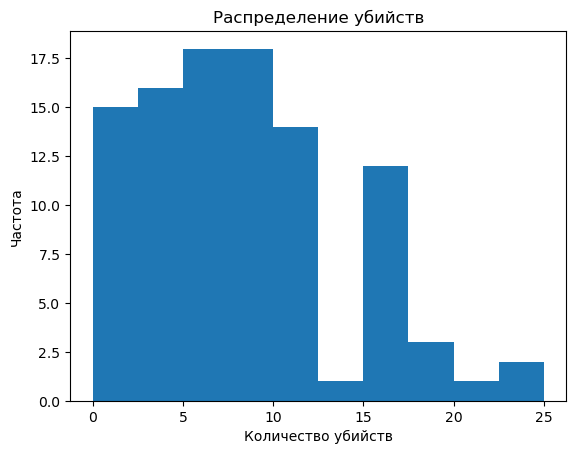

In [10]:
df_heroes_am['kills'].plot(kind='hist', bins=10, title='Распределение убийств')
plt.xlabel('Количество убийств')
plt.ylabel('Частота')
plt.show()

In [11]:
df_heroes_am.head(10)

,match_id,start_time,duration,radiant_win,leagueid,league_name,radiant,player_slot,account_id,kills,deaths,assists
0,7495768582,1702982182,1823,True,15716,Destiny league,False,131,1083977859,6,7,2
1,7495682150,1702976841,2551,True,15960,Electro Dilemma | Cringe Station,True,0,1001005037,17,1,9
2,7495461503,1702959879,1473,True,15716,Destiny league,True,0,1185918470,3,1,5
3,7494962146,1702922536,2036,True,15901,Ultras Dota Pro League 2023-24,True,3,323131650,11,2,19
4,7494281661,1702897696,2130,False,15898,European Pro League 2023-2024 Season,False,4,345509021,5,7,0
5,7494231136,1702895040,1294,True,15901,Ultras Dota Pro League 2023-24,True,2,1598219170,12,1,7
6,7492915992,1702820380,1645,True,15901,Ultras Dota Pro League 2023-24,False,129,171897192,9,3,0
7,7492770829,1702815854,2010,True,12903,YouTube SIVVIT - Big Russian Show,True,3,1212402402,24,4,16
8,7492729667,1702814510,2987,True,12903,YouTube SIVVIT - Big Russian Show,True,3,1099645354,12,1,10
9,7492722989,1702814285,1069,False,15901,Ultras Dota Pro League 2023-24,False,1,1616488203,0,4,0


In [16]:
winstat=df_heroes_am[(df_heroes_am['radiant_win']==True) & (df_heroes_am['radiant'] == True)]
winstat.head()

,match_id,start_time,duration,radiant_win,leagueid,league_name,radiant,player_slot,account_id,kills,deaths,assists
1,7495682150,1702976841,2551,True,15960,Electro Dilemma | Cringe Station,True,0,1001005037,17,1,9
2,7495461503,1702959879,1473,True,15716,Destiny league,True,0,1185918470,3,1,5
3,7494962146,1702922536,2036,True,15901,Ultras Dota Pro League 2023-24,True,3,323131650,11,2,19
5,7494231136,1702895040,1294,True,15901,Ultras Dota Pro League 2023-24,True,2,1598219170,12,1,7
7,7492770829,1702815854,2010,True,12903,YouTube SIVVIT - Big Russian Show,True,3,1212402402,24,4,16


In [19]:
winstat[winstat['radiant_win']].count()

match_id       24
start_time     24
duration       24
radiant_win    24
leagueid       24
league_name    24
radiant        24
player_slot    24
account_id     24
kills          24
deaths         24
assists        24
dtype: int64

In [20]:
len(winstat)

24

In [21]:
losestat=df_heroes_am[(df_heroes_am['radiant_win']==False) & (df_heroes_am['radiant'] == True)]
losestat.head()

,match_id,start_time,duration,radiant_win,leagueid,league_name,radiant,player_slot,account_id,kills,deaths,assists
10,7492497351,1702805590,1730,False,15901,Ultras Dota Pro League 2023-24,True,128,381629803,10,2,10
12,7491135262,1702738584,1470,False,15901,Ultras Dota Pro League 2023-24,True,129,1149355168,9,1,7
16,7488849703,1702638416,2271,False,15716,Destiny league,True,130,1170923497,16,3,10
19,7488145963,1702584176,1735,False,15660,Dota 2 Space League,True,128,341654420,9,3,16
20,7487372527,1702551623,1504,False,15819,Ancients League,True,129,1427100407,4,2,13


In [22]:
len(losestat)

25

In [23]:
losestat2=df_heroes_am[(df_heroes_am['radiant_win']==True) & (df_heroes_am['radiant'] == False)]
losestat2.head()

,match_id,start_time,duration,radiant_win,leagueid,league_name,radiant,player_slot,account_id,kills,deaths,assists
0,7495768582,1702982182,1823,True,15716,Destiny league,False,131,1083977859,6,7,2
6,7492915992,1702820380,1645,True,15901,Ultras Dota Pro League 2023-24,False,129,171897192,9,3,0
11,7491505712,1702750322,1576,True,15901,Ultras Dota Pro League 2023-24,False,129,1616488203,6,3,6
13,7490936033,1702733024,1905,True,15901,Ultras Dota Pro League 2023-24,False,129,1616488203,6,5,10
15,7489214478,1702650856,2393,True,15898,European Pro League 2023-2024 Season,False,130,130123201,6,4,5


In [24]:
winstat2=df_heroes_am[(df_heroes_am['radiant_win']==False) & (df_heroes_am['radiant'] == False)]
winstat2.head()

,match_id,start_time,duration,radiant_win,leagueid,league_name,radiant,player_slot,account_id,kills,deaths,assists
4,7494281661,1702897696,2130,False,15898,European Pro League 2023-2024 Season,False,4,345509021,5,7,0
9,7492722989,1702814285,1069,False,15901,Ultras Dota Pro League 2023-24,False,1,1616488203,0,4,0
21,7487227898,1702542275,2019,False,15716,Destiny league,False,2,913081877,7,6,5
24,7485536546,1702428460,1761,False,15660,Dota 2 Space League,False,0,222022666,1,6,1
28,7483038384,1702284538,1515,False,15716,Destiny league,False,0,181339278,3,4,1


In [30]:
win=len(winstat)+len(winstat2)
win

41

In [29]:
lose=len(losestat)+len(losestat2)
lose

59

In [31]:
df_heroes_am[df_heroes_am['duration']>2300]

,match_id,start_time,duration,radiant_win,leagueid,league_name,radiant,player_slot,account_id,kills,deaths,assists
1,7495682150,1702976841,2551,True,15960,Electro Dilemma | Cringe Station,True,0,1001005037,17,1,9
8,7492729667,1702814510,2987,True,12903,YouTube SIVVIT - Big Russian Show,True,3,1099645354,12,1,10
15,7489214478,1702650856,2393,True,15898,European Pro League 2023-2024 Season,False,130,130123201,6,4,5
23,7486581725,1702490371,2386,True,15898,European Pro League 2023-2024 Season,True,4,241519559,5,1,5
31,7478281888,1702044047,2917,True,15960,Electro Dilemma | Cringe Station,True,0,1001005037,11,8,19
36,7476171881,1701922290,2419,True,15960,Electro Dilemma | Cringe Station,True,0,1001005037,12,4,7
37,7475394869,1701873385,2758,False,15857,ESportsBattle | DOTA2 WC6,False,0,349569834,9,6,9
39,7474495009,1701813645,3563,False,15857,ESportsBattle | DOTA2 WC6,True,129,349569834,25,6,12
46,7471374417,1701631502,4606,True,15931,Pinnacle: 25 Year Anniversary Show,False,128,172099728,8,7,16
48,7470148540,1701586029,2525,False,15972,2023电竞上海大师赛,True,128,170896543,17,3,8


In [32]:
2300/60

38.333333333333336

In [35]:
concatenated_df = pd.concat([winstat, winstat2])
concatenated_df

,match_id,start_time,duration,radiant_win,leagueid,league_name,radiant,player_slot,account_id,kills,deaths,assists
1,7495682150,1702976841,2551,True,15960,Electro Dilemma | Cringe Station,True,0,1001005037,17,1,9
2,7495461503,1702959879,1473,True,15716,Destiny league,True,0,1185918470,3,1,5
3,7494962146,1702922536,2036,True,15901,Ultras Dota Pro League 2023-24,True,3,323131650,11,2,19
5,7494231136,1702895040,1294,True,15901,Ultras Dota Pro League 2023-24,True,2,1598219170,12,1,7
7,7492770829,1702815854,2010,True,12903,YouTube SIVVIT - Big Russian Show,True,3,1212402402,24,4,16
8,7492729667,1702814510,2987,True,12903,YouTube SIVVIT - Big Russian Show,True,3,1099645354,12,1,10
14,7490779220,1702728146,2025,True,16012,蜜的耐神闹Meternational S2,True,1,162513936,16,0,8
23,7486581725,1702490371,2386,True,15898,European Pro League 2023-2024 Season,True,4,241519559,5,1,5
31,7478281888,1702044047,2917,True,15960,Electro Dilemma | Cringe Station,True,0,1001005037,11,8,19
32,7478005503,1702033599,2134,True,15716,Destiny league,True,0,56981677,12,5,18


In [36]:
concatenated_lose = pd.concat([losestat, losestat2])
concatenated_lose

,match_id,start_time,duration,radiant_win,leagueid,league_name,radiant,player_slot,account_id,kills,deaths,assists
10,7492497351,1702805590,1730,False,15901,Ultras Dota Pro League 2023-24,True,128,381629803,10,2,10
12,7491135262,1702738584,1470,False,15901,Ultras Dota Pro League 2023-24,True,129,1149355168,9,1,7
16,7488849703,1702638416,2271,False,15716,Destiny league,True,130,1170923497,16,3,10
19,7488145963,1702584176,1735,False,15660,Dota 2 Space League,True,128,341654420,9,3,16
20,7487372527,1702551623,1504,False,15819,Ancients League,True,129,1427100407,4,2,13
25,7484603441,1702380405,1781,False,15819,Ancients League,True,130,1459382454,20,3,15
26,7484255445,1702354382,1771,False,15819,Ancients League,True,129,1524633248,16,1,12
30,7480924160,1702167399,1863,False,15660,Dota 2 Space League,True,132,162663319,7,3,9
38,7474802466,1701843399,1519,False,15716,Destiny league,True,129,1170923497,9,0,11
39,7474495009,1701813645,3563,False,15857,ESportsBattle | DOTA2 WC6,True,129,349569834,25,6,12


In [37]:
concatenated_df.describe()

,match_id,start_time,duration,leagueid,player_slot,account_id,kills,deaths,assists
count,4.100000e+01,4.100000e+01,41.000000,41.000000,41.000000,4.100000e+01,41.000000,41.000000,41.000000
mean,7.465777e+09,1.701404e+09,2059.024390,15634.341463,1.463415,7.923220e+08,9.170732,3.487805,9.268293
std,2.508705e+07,1.284766e+06,504.109288,678.337733,1.518182,5.587102e+08,5.589734,2.589613,5.809580
min,7.420584e+09,1.699192e+09,1069.000000,12903.000000,0.000000,5.698168e+07,0.000000,0.000000,0.000000
25%,7.438851e+09,1.699974e+09,1753.000000,15716.000000,0.000000,2.415196e+08,5.000000,1.000000,5.000000
50%,7.473416e+09,1.701763e+09,2019.000000,15819.000000,1.000000,1.001005e+09,9.000000,3.000000,9.000000
75%,7.486582e+09,1.702490e+09,2204.000000,15909.000000,3.000000,1.213509e+09,12.000000,5.000000,14.000000
max,7.495682e+09,1.702977e+09,3474.000000,16012.000000,4.000000,1.616488e+09,24.000000,10.000000,20.000000


In [38]:
concatenated_lose.describe()

,match_id,start_time,duration,leagueid,player_slot,account_id,kills,deaths,assists
count,5.900000e+01,5.900000e+01,59.000000,59.000000,59.000000,5.900000e+01,59.000000,59.000000,59.000000
mean,7.462571e+09,1.701220e+09,1943.000000,15515.644068,129.711864,7.701213e+08,7.610169,4.084746,6.915254
std,2.199838e+07,1.138658e+06,577.267224,703.170156,1.497709,5.375695e+08,5.539877,2.805709,4.561035
min,7.420562e+09,1.699192e+09,784.000000,12903.000000,128.000000,5.698168e+07,0.000000,0.000000,0.000000
25%,7.444462e+09,1.700242e+09,1625.000000,15660.000000,128.000000,2.032566e+08,3.000000,2.000000,3.000000
50%,7.461339e+09,1.701097e+09,1849.000000,15806.000000,129.000000,8.682314e+08,7.000000,4.000000,6.000000
75%,7.484139e+09,1.702342e+09,2108.500000,15899.500000,131.000000,1.172089e+09,9.000000,6.000000,9.500000
max,7.495769e+09,1.702982e+09,4606.000000,16007.000000,132.000000,1.616488e+09,25.000000,12.000000,20.000000


In [45]:
matches_above_2200=len(concatenated_df[concatenated_df['duration']>2200])
matches_below_2200=len(concatenated_df[concatenated_df['duration']<2200])

In [48]:
matches_above_2200_=len(concatenated_lose[concatenated_lose['duration']>2200])
matches_below_2200_=len(concatenated_lose[concatenated_lose['duration']<2200])

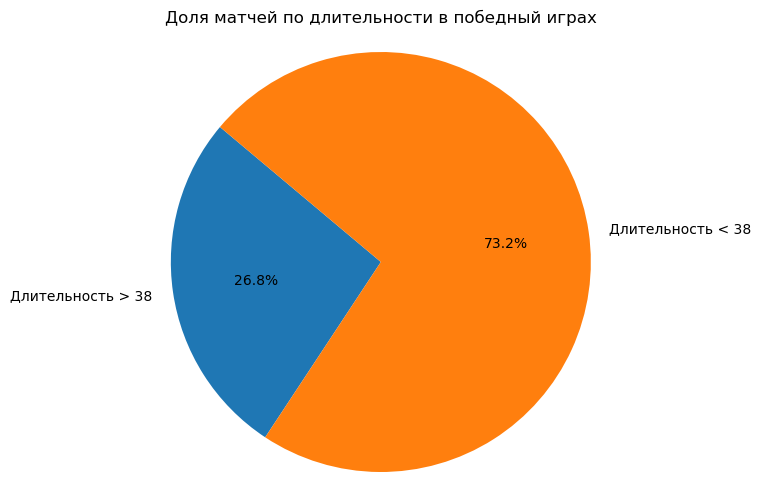

In [51]:
# Создание списка значений и меток для круговой диаграммы
values = [matches_above_2200, matches_below_2200]
labels = ['Длительность > 38', 'Длительность < 38']

# Построение круговой диаграммы
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Доля матчей по длительности в победный играх')
plt.axis('equal')  # Отображение в виде круга
plt.show()

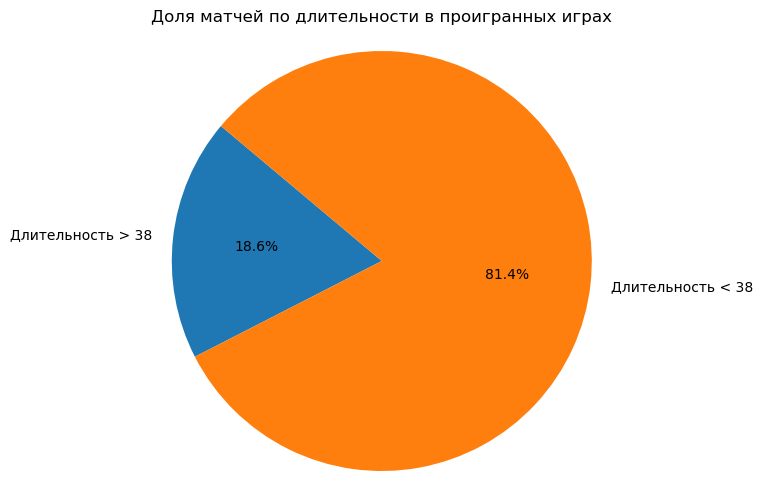

In [50]:
# Создание списка значений и меток для круговой диаграммы
values = [matches_above_2200_, matches_below_2200_]
labels = ['Длительность > 38', 'Длительность < 38']

# Построение круговой диаграммы
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Доля матчей по длительности в проигранных играх')
plt.axis('equal')  # Отображение в виде круга
plt.show()

In [52]:
average_kills_wins = concatenated_df['kills'].mean()
average_kills_wins

9.170731707317072

In [53]:
average_kills_lose = concatenated_lose['kills'].mean()
average_kills_lose

7.610169491525424

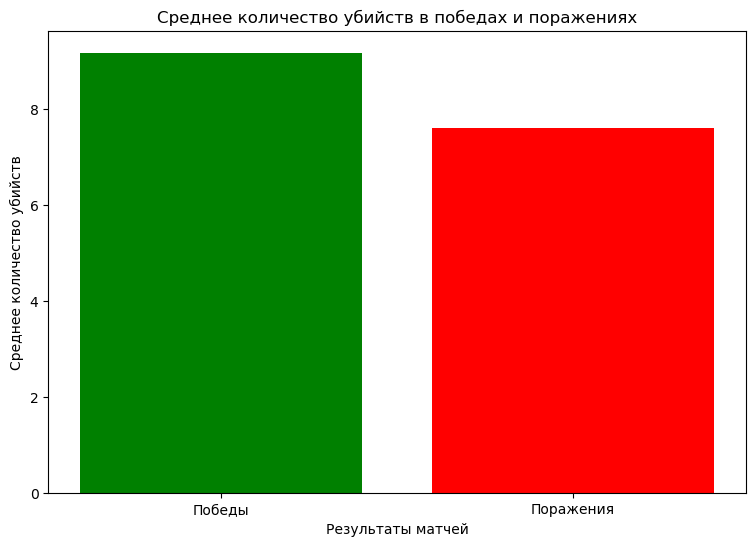

In [59]:
average_kills = [average_kills_wins, average_kills_lose]
labels = ['Победы', 'Поражения']

# Построение гистограммы
plt.figure(figsize=(9, 6))
plt.bar(labels, average_kills, color=['green', 'red'])
plt.title('Среднее количество убийств в победах и поражениях')
plt.xlabel('Результаты матчей')
plt.ylabel('Среднее количество убийств')
plt.show()

C:\Users\apltk\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


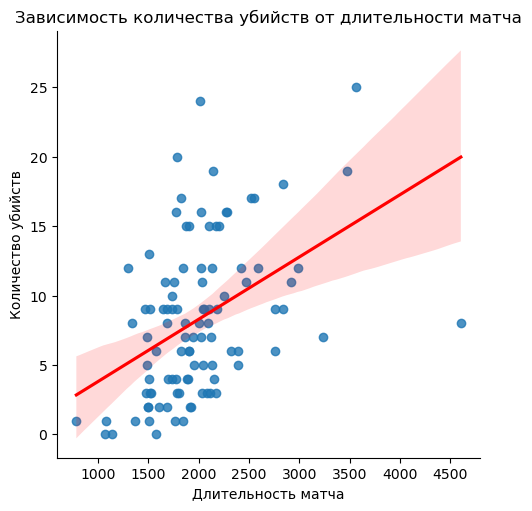

In [60]:
import seaborn as sns

# Построение регрессионной модели и scatter plot
sns.lmplot(x='duration', y='kills', data=df_heroes_am, line_kws={'color': 'red'})
plt.title('Зависимость количества убийств от длительности матча')
plt.xlabel('Длительность матча')
plt.ylabel('Количество убийств')
plt.show()

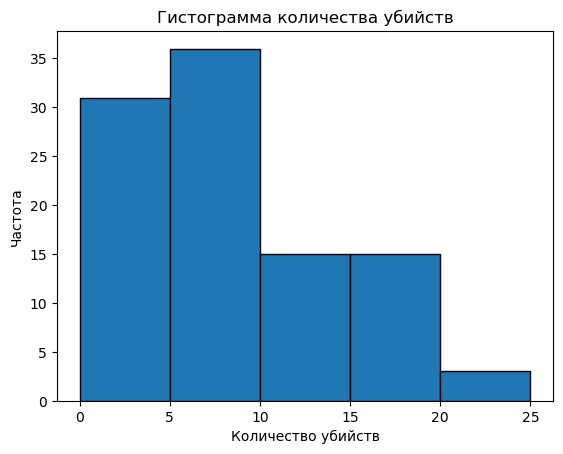

In [61]:
df_heroes_am['kills'].plot(kind='hist', bins=5, edgecolor='black')  # bins - количество столбцов на гистограмме
plt.title('Гистограмма количества убийств')
plt.xlabel('Количество убийств')
plt.ylabel('Частота')
plt.show()

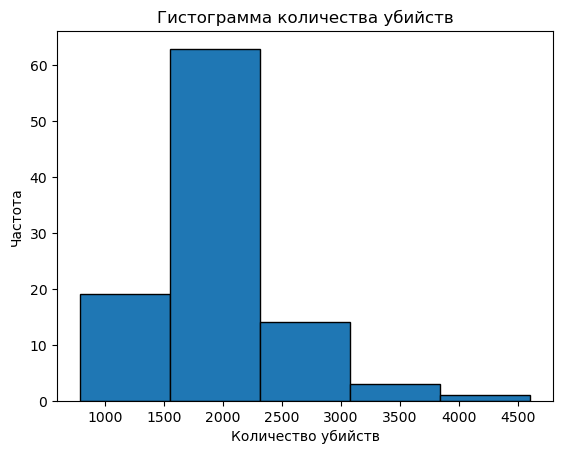

In [62]:
df_heroes_am['duration'].plot(kind='hist', bins=5, edgecolor='black')  # bins - количество столбцов на гистограмме
plt.title('Гистограмма количества убийств')
plt.xlabel('Количество убийств')
plt.ylabel('Частота')
plt.show()

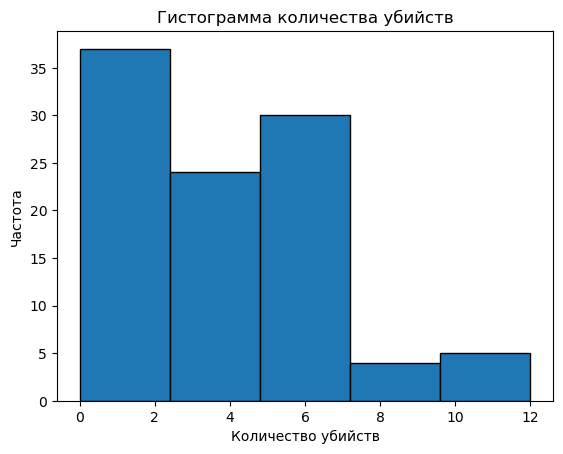

In [63]:
df_heroes_am['deaths'].plot(kind='hist', bins=5, edgecolor='black')  # bins - количество столбцов на гистограмме
plt.title('Гистограмма количества убийств')
plt.xlabel('Количество убийств')
plt.ylabel('Частота')
plt.show()

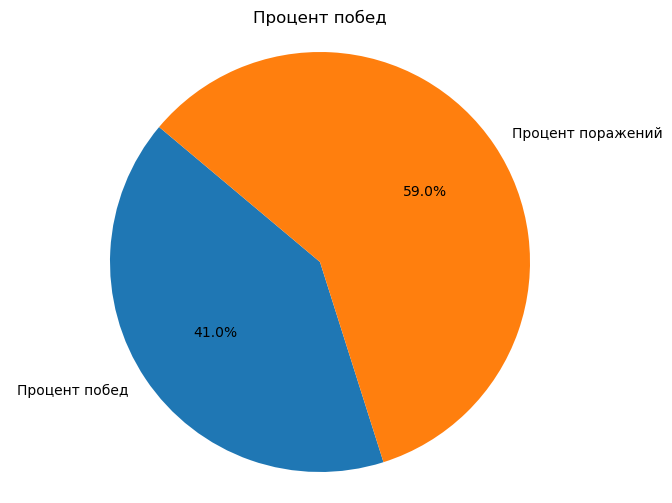

In [64]:
# Создание списка значений и меток для круговой диаграммы
values = [win, lose]
labels = ['Процент побед', 'Процент поражений']

# Построение круговой диаграммы
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Процент побед')
plt.axis('equal')  # Отображение в виде круга
plt.show()

In [69]:
df_heroes_am[df_heroes_am['duration']<1500].describe()

,match_id,start_time,duration,leagueid,player_slot,account_id,kills,deaths,assists
count,1.300000e+01,1.300000e+01,13.000000,13.000000,13.000000,1.300000e+01,13.000000,13.000000,13.000000
mean,7.466709e+09,1.701435e+09,1305.076923,15256.000000,90.153846,1.038749e+09,3.923077,2.769231,4.615385
std,2.468049e+07,1.290398e+06,224.713692,842.525865,62.048162,4.723923e+08,3.904304,2.350668,3.254189
min,7.423143e+09,1.699287e+09,784.000000,12903.000000,0.000000,2.081565e+08,0.000000,0.000000,0.000000
25%,7.447991e+09,1.700408e+09,1139.000000,14915.000000,2.000000,1.051363e+09,1.000000,1.000000,3.000000
50%,7.465717e+09,1.701355e+09,1366.000000,15716.000000,129.000000,1.087461e+09,2.000000,2.000000,4.000000
75%,7.491135e+09,1.702739e+09,1486.000000,15901.000000,130.000000,1.185918e+09,7.000000,4.000000,7.000000
max,7.495462e+09,1.702960e+09,1496.000000,15909.000000,132.000000,1.616488e+09,12.000000,8.000000,10.000000


In [68]:
1500/60

25.0